### ***--> Installing the required libraries***

In [1]:
pip install pandas matplotlib seaborn prophet scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

### ***--> Loading Daily Data***

In [3]:
daily_data = pd.read_csv(r"C:/Users/Saiku/Downloads/SN_d_tot_V2.0.csv", delimiter=';', header=None)
daily_data.columns = ["Year", "Month", "Day", "FractionalYear", "SunspotNumber", "StdDev", "Observations", "Indicator"]
daily_data = daily_data[daily_data["SunspotNumber"] != -1]  # Remove missing values
daily_data['Date'] = pd.to_datetime(daily_data[['Year', 'Month', 'Day']])
daily_data = daily_data[['Date', 'SunspotNumber']].rename(columns={'Date': 'ds', 'SunspotNumber': 'y'})

In [4]:
daily_data['y'] = daily_data['y'].replace(0, 1e-6)  # Replace zeros with a small positive value

In [5]:
daily_data['y'] = daily_data['y'].apply(lambda x: np.log(x + 1e-6))  # Log transform with small constant

In [6]:
daily_data = daily_data[daily_data['y'] > 0]  # Remove zero values

###***--> Training the FBProphet Model***

In [7]:
# Initialize Prophet Model
daily_model = Prophet()

# Fit the model
daily_model.fit(daily_data)

# Create future dataframe (365 days)
future_daily = daily_model.make_future_dataframe(periods=365)

# Predict
forecast_daily = daily_model.predict(future_daily)

13:28:54 - cmdstanpy - INFO - Chain [1] start processing
13:29:49 - cmdstanpy - INFO - Chain [1] done processing


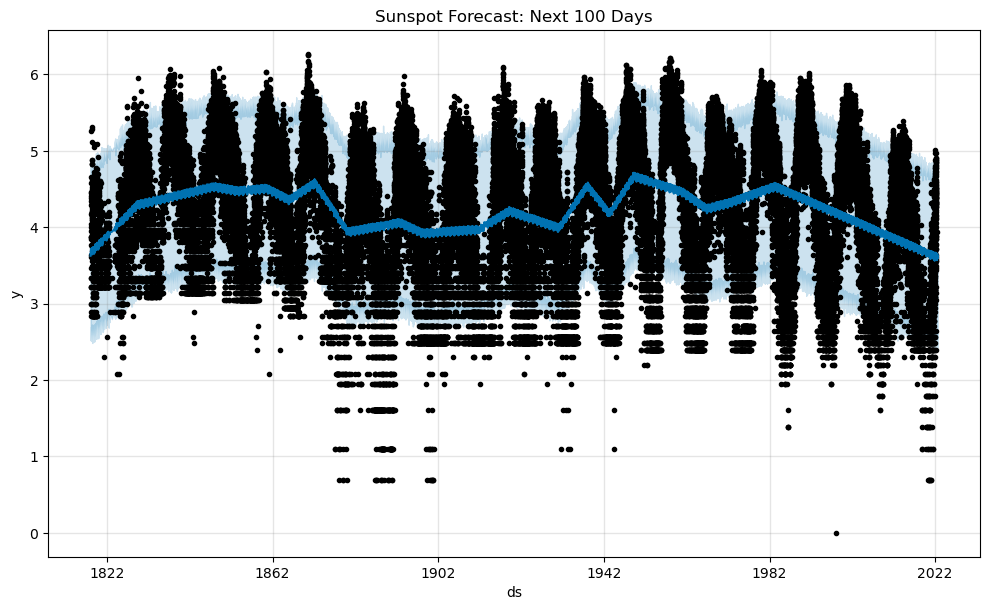

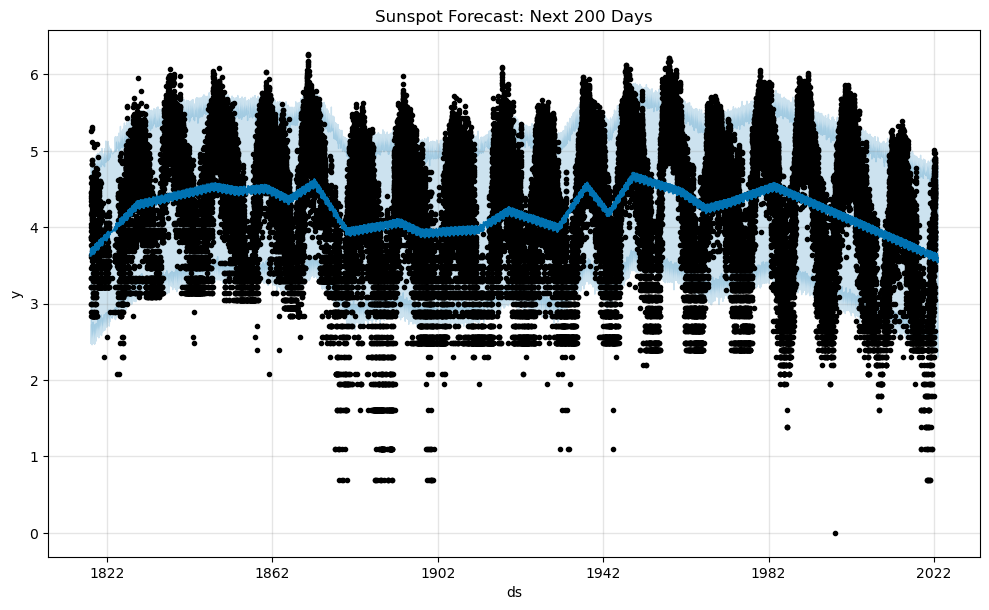

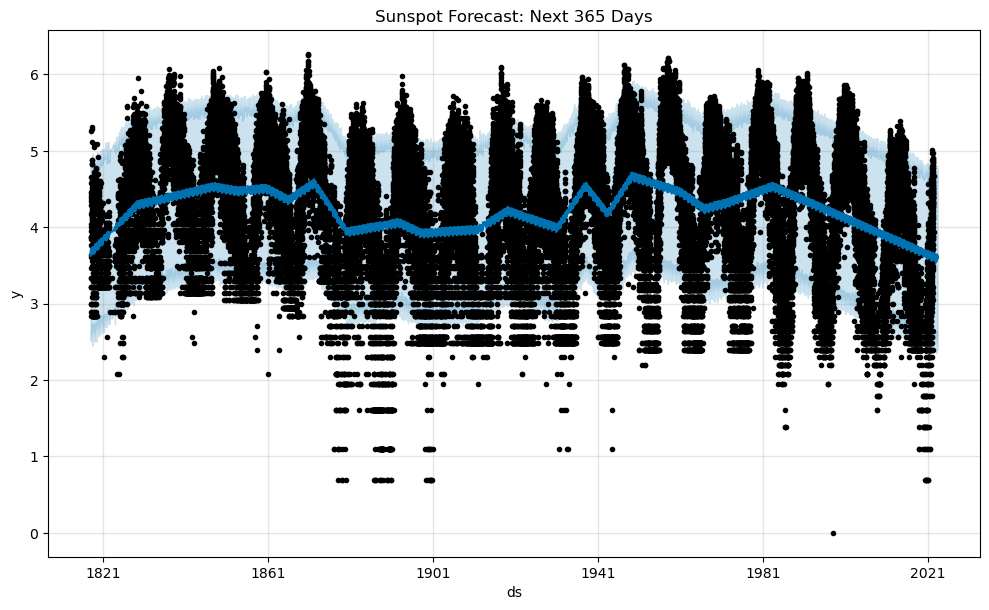

In [12]:
# Predict for 100, 200, and 365 days
future_daily_100 = daily_model.make_future_dataframe(periods=100)
future_daily_200 = daily_model.make_future_dataframe(periods=200)
future_daily_365 = daily_model.make_future_dataframe(periods=365)

# Predict 100 days
forecast_daily_100 = daily_model.predict(future_daily_100)

# Predict 200 days
forecast_daily_200 = daily_model.predict(future_daily_200)

# Predict 365 days
forecast_daily_365 = daily_model.predict(future_daily_365)

# Visualize predictions for each forecast
fig_100 = daily_model.plot(forecast_daily_100)
plt.title("Sunspot Forecast: Next 100 Days")
plt.show()

fig_200 = daily_model.plot(forecast_daily_200)
plt.title("Sunspot Forecast: Next 200 Days")
plt.show()

fig_365 = daily_model.plot(forecast_daily_365)
plt.title("Sunspot Forecast: Next 365 Days")
plt.show()

In [9]:
# For 100 days prediction
print("Predicted values for the next 100 days:")
print(forecast_daily_100[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100))

# For 200 days prediction
print("Predicted values for the next 200 days:")
print(forecast_daily_200[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(200))

# For 365 days prediction
print("Predicted values for the next 365 days:")
print(forecast_daily_365[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365))

Predicted values for the next 100 days:
              ds      yhat  yhat_lower  yhat_upper
59985 2022-05-01  3.653769    2.503472    4.829540
59986 2022-05-02  3.656339    2.583249    4.767498
59987 2022-05-03  3.650645    2.565748    4.647781
59988 2022-05-04  3.659089    2.495556    4.657790
59989 2022-05-05  3.648879    2.566559    4.855303
...          ...       ...         ...         ...
60080 2022-08-04  3.593094    2.515848    4.618548
60081 2022-08-05  3.596886    2.473654    4.677300
60082 2022-08-06  3.601450    2.504650    4.659980
60083 2022-08-07  3.607554    2.483761    4.645691
60084 2022-08-08  3.611263    2.493544    4.640593

[100 rows x 4 columns]
Predicted values for the next 200 days:
              ds      yhat  yhat_lower  yhat_upper
59985 2022-05-01  3.653769    2.512408    4.708348
59986 2022-05-02  3.656339    2.596350    4.668734
59987 2022-05-03  3.650645    2.513805    4.699188
59988 2022-05-04  3.659089    2.540848    4.705159
59989 2022-05-05  3.648879   

###***--> Visualizing Predictions***

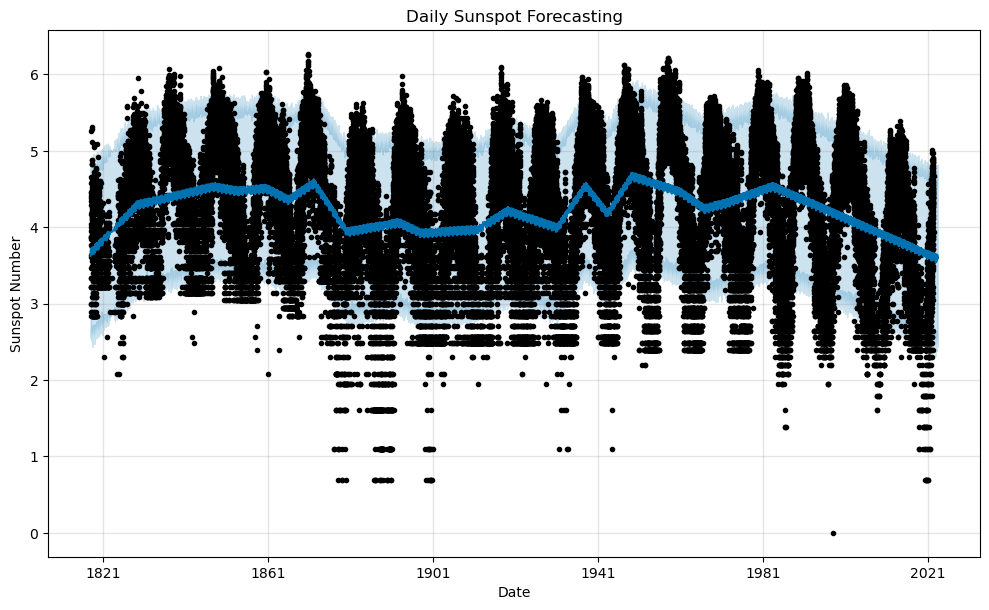

In [13]:
fig = daily_model.plot(forecast_daily)
plt.title("Daily Sunspot Forecasting")
plt.xlabel("Date")
plt.ylabel("Sunspot Number")
plt.show()

### ***--> Tune Hyperparameters : Adding custom seasonality***

In [16]:
daily_model = Prophet(growth='linear', changepoint_prior_scale=0.05)
daily_model.add_seasonality(name='yearly', period=365.25, fourier_order=10)

# Fit and Predict again
daily_model.fit(daily_data)
forecast_daily = daily_model.predict(future_daily)

13:32:59 - cmdstanpy - INFO - Chain [1] start processing
13:33:50 - cmdstanpy - INFO - Chain [1] done processing


###***--> Evaluating Model Performance***

In [18]:
y_true = daily_data['y'].tail(100)
y_pred = forecast_daily['yhat'][-100:]

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae}, MAPE: {mape}, R²: {r2}")

MAE: 0.6740107878084415, MAPE: 0.1582095763430054, R²: -1.1197935064342102
